In [107]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import ks_2samp
from scipy import stats
from config import connection
# connect to the database
engine = create_engine(connection) 
Base = automap_base()
Base.prepare(engine, schema='economy', reflect=True) 

# save classes as variables, prepare classes
job = Base.classes.job
company = Base.classes.company
state = Base.classes.state
# query our database (pull data and save into objects)
session = Session(engine) 

#Extract tables from Amazon RDS postgres database
job_table = session.query(job)
print(job_table) 
company_table = session.query(company) 
print(company_table) 
state_table = session.query(state)
print(state_table) 

# using the tables to create new pandas dataframe
job_df = pd.read_sql(job_table.statement, engine.connect())
print(job_df)
company_df = pd.read_sql(company_table.statement, engine.connect())
print(company_df)
state_df = pd.read_sql(state_table.statement, engine.connect())
print(state_df)


/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_70248/3576249463.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='economy', reflect=True)


SELECT economy.job.job_id AS economy_job_job_id, economy.job.job_title AS economy_job_job_title, economy.job.avg_salary AS economy_job_avg_salary, economy.job.min_salary AS economy_job_min_salary, economy.job.max_salary AS economy_job_max_salary, economy.job.easy_apply AS economy_job_easy_apply, economy.job.company_id AS economy_job_company_id, economy.job.state_id AS economy_job_state_id 
FROM economy.job
SELECT economy.company.company_id AS economy_company_company_id, economy.company.state_id AS economy_company_state_id, economy.company.company_name AS economy_company_company_name, economy.company.rating AS economy_company_rating, economy.company.size AS economy_company_size, economy.company.headquarter AS economy_company_headquarter, economy.company.founded AS economy_company_founded, economy.company.type_of_ownership AS economy_company_type_of_ownership, economy.company.industry AS economy_company_industry, economy.company.sector AS economy_company_sector, economy.company.revenue A

In [112]:
df = pd.read_csv('data/clean_data.csv')
df


,Job_id,Job Title,Rating,Company_id,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Avg_Salary,Min_Salary,Max_Salary,State_id,City,State,Headquarter
0,0,Business Analyst - Clinical & Logistics Platform,3.9,0,Memorial Sloan-Kettering,10000+ employees,1884.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 - $5 billion,NaN,107000.0,56000.0,102000.0,0,New York,NY,NY
1,1,Business Analyst,3.8,1,Paine Schwartz Partners,1 to 50 employees,NaN,Company - Private,Venture Capital & Private Equity,Finance,NaN,1.0,107000.0,56000.0,102000.0,1,New York,NY,NY
2,2,Data Analyst,3.6,2,Asembia,501 to 1000 employees,2004.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 - $10 million,NaN,107000.0,56000.0,102000.0,2,Florham Park,NJ,NJ
3,3,"Information Security Analyst, Incident Response",3.6,3,BD,10000+ employees,1897.0,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion,NaN,107000.0,56000.0,102000.0,3,Franklin Lakes,NJ,NJ
4,4,Analyst - FP&A Global Revenue,3.4,4,Rubicon Project,201 to 500 employees,2007.0,Company - Public,Internet,Information Technology,$100 - $500 million,1.0,107000.0,56000.0,102000.0,4,New York,NY,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4087,Ref ID: 01120-0011488945Classification: Help D...,NaN,4087,"Menlo Park, CA",Company - Public,NaN,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",NaN,NaN,3500.0,NaN,NaN,4087,10000+ employees,NaN,NaN
4088,4088,Job Title: System Analyst (Data) - PL/SQl Serv...,NaN,4088,"Princeton, NJ",Company - Private,NaN,Information Technology,$100 to $500 million (USD),NaN,NaN,NaN,3900.0,NaN,NaN,4088,501 to 1000 employees,NaN,NaN
4089,4089,Job Opening Summary\nReports to the Systems Ap...,NaN,4089,"Gainesville, FL",Subsidiary or Business Segment,NaN,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",NaN,NaN,4000.0,NaN,NaN,4089,10000+ employees,NaN,NaN
4090,4090,Job Description\nA knowledgeable job-seeker is...,NaN,4090,"Mount Laurel, NJ",Company - Private,NaN,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",NaN,NaN,4400.0,NaN,NaN,4090,1001 to 5000 employees,NaN,NaN


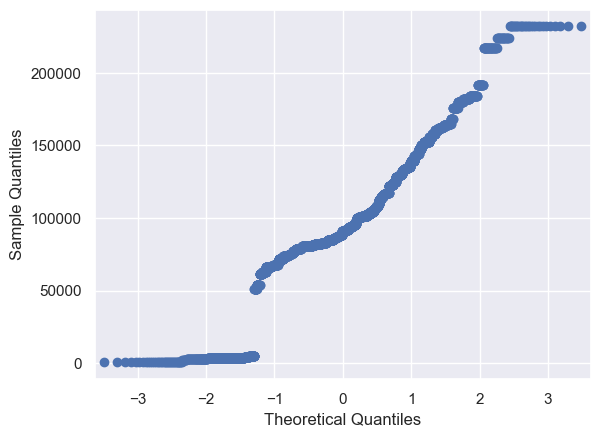

In [93]:
##QQ PLOT
import pandas as pd 
import statsmodels.api as sm 
import matplotlib as plt 
import numpy as np 
df = pd.read_csv('data/clean_data.csv')
fig=sm.qqplot(df["Avg_Salary"])


Text(0.5, 1.0, 'Most Common Job Titles')

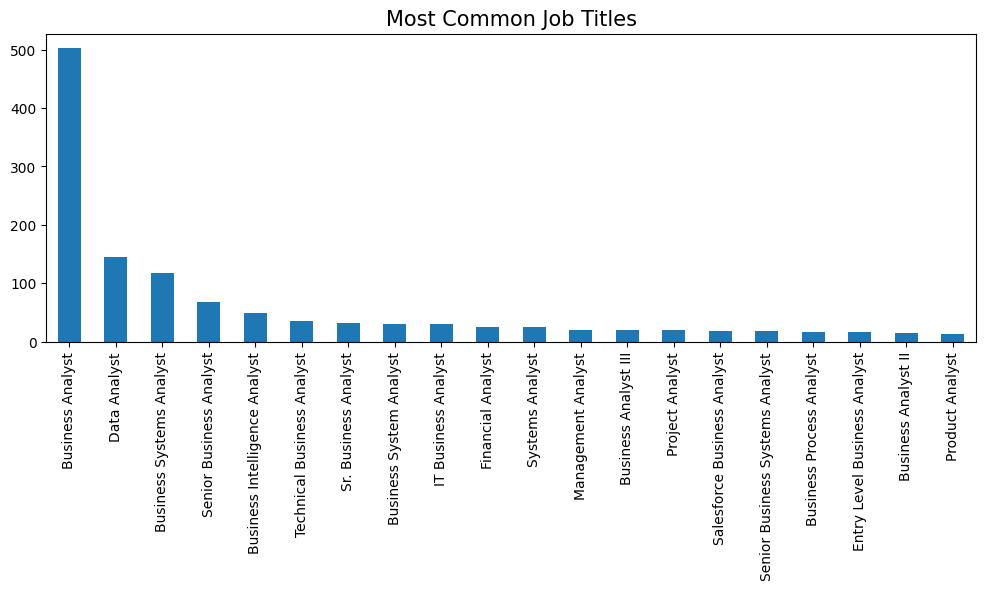

In [50]:
df['Job Title'].value_counts()[:20].plot(kind='bar', figsize=(12,4)) 
plt.title('Most Common Job Titles', fontsize=15, fontweight='normal')

Text(0.5, 1.0, 'Job offers by State')

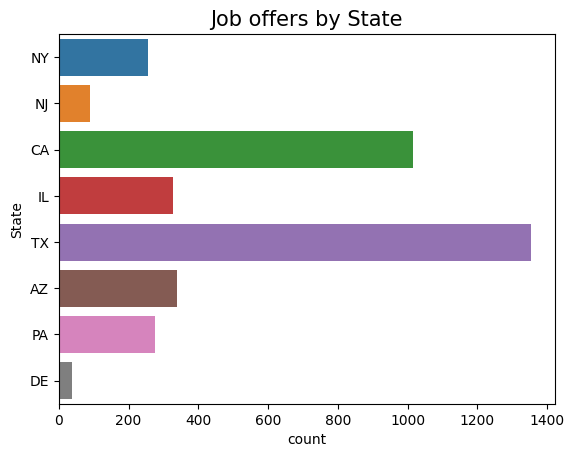

In [132]:
sns.countplot(y='State',data= df)
plt.title('Job offers by State', fontsize=12, fontweight='normal')

Text(0.5, 1.0, 'Average Salary by State')

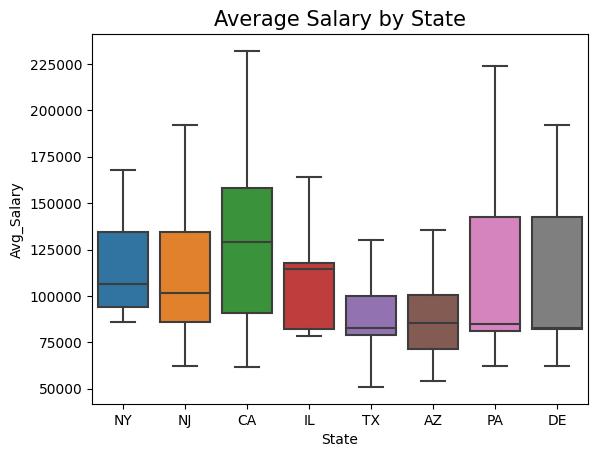

In [55]:
sns.boxplot(x= 'State', y= 'Avg_Salary', data= df, showfliers=False)
plt.title('Average Salary by State', fontsize=12, fontweight='normal')

Text(0.5, 1.0, 'Job Rating by State')

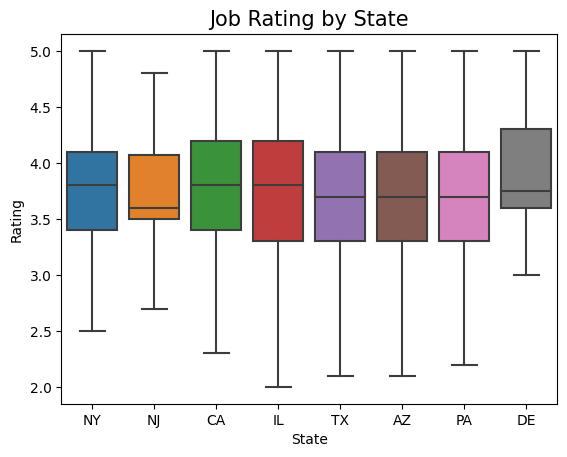

In [88]:
sns.boxplot(x= 'State', y= 'Rating', data= df, showfliers=False)
plt.title('Job Rating by State', fontsize=12, fontweight='normal')

Text(0.5, 1.0, 'Job offers by Sectors')

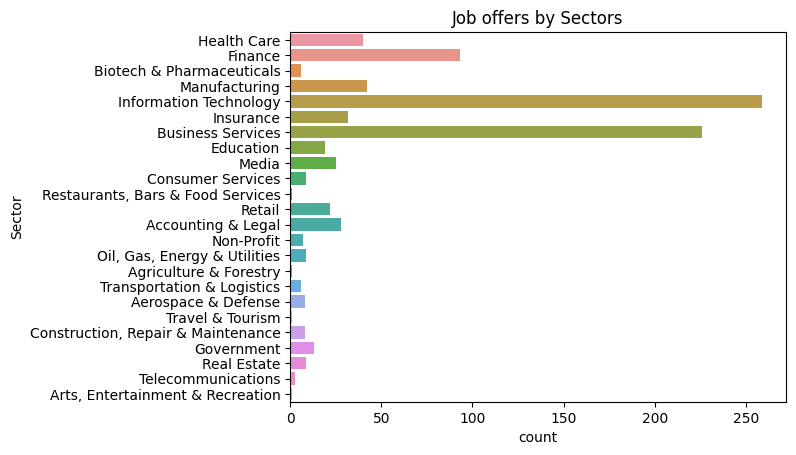

In [163]:
sns.countplot(y='Sector', data= df[:1000])
plt.title('Job offers by Sectors', fontsize=12, fontweight='normal')

Text(0.5, 1.0, 'Average salary by Sectors')

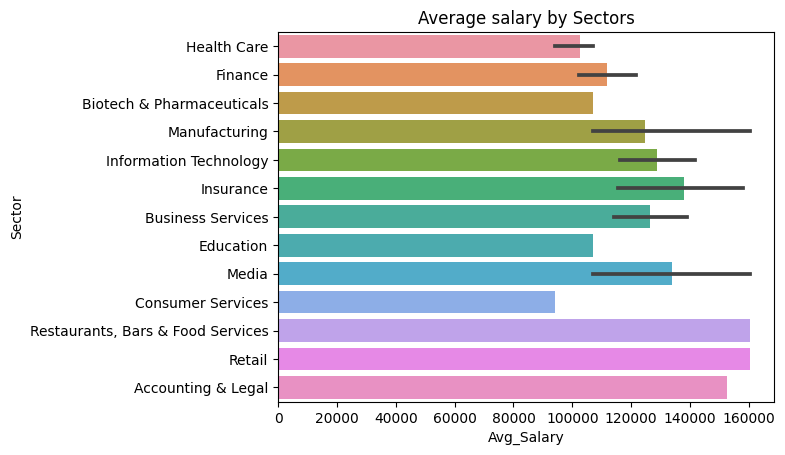

In [169]:
sns.barplot(x='Avg_Salary',y='Sector',data=df[:100])
plt.title('Average salary by Sectors', fontsize=12, fontweight='normal')


Text(0.5, 1.0, 'Companies with more than 20 job offers')

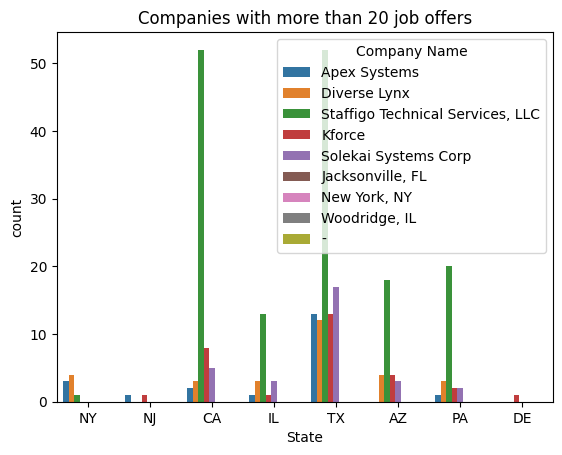

In [165]:
com25 = df['Company Name'].map(df['Company Name'].value_counts()) > 20 
com25
sns.countplot(x='State', hue='Company Name', data= df[com25])
plt.title('Companies with more than 20 job offers', fontsize=12, fontweight='normal')

In [87]:
df['Company Name'].value_counts()[:30]

Staffigo Technical Services, LLC                 156
Jacksonville, FL                                  85
New York, NY                                      39
Solekai Systems Corp                              30
Kforce                                            30
Diverse Lynx                                      29
-                                                 23
Woodridge, IL                                     22
Apex Systems                                      21
Lorven Technologies Inc                           20
MUFG                                              20
Randstad                                          20
USAA                                              19
nana                                              17
Kforce Technology Staffing                        17
eTeam Inc.                                        17
Google                                            16
Mondo                                             15
Robert Half                                   

Text(0.5, 1.0, 'Min vs Max Salary')

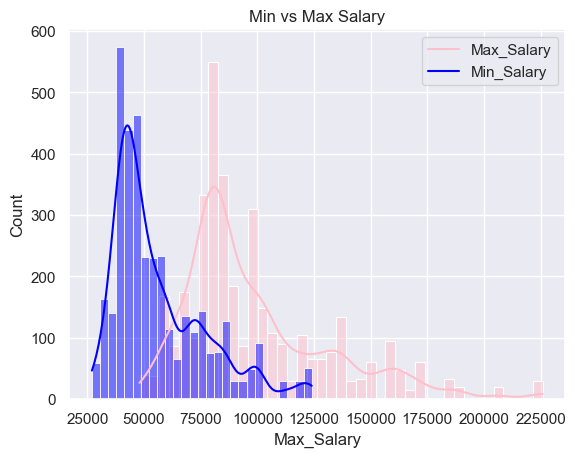

In [103]:
sns.histplot(df['Max_Salary'],kde= True, color ='pink')
sns.histplot(df['Min_Salary'], kde= True, color = 'blue')
plt.legend(loc= 'upper right', labels = ['Max_Salary','Min_Salary'])
plt.title('Min vs Max Salary', fontsize=12, fontweight='normal') 

Text(0.5, 1.0, 'Company Ratings vs Salary')

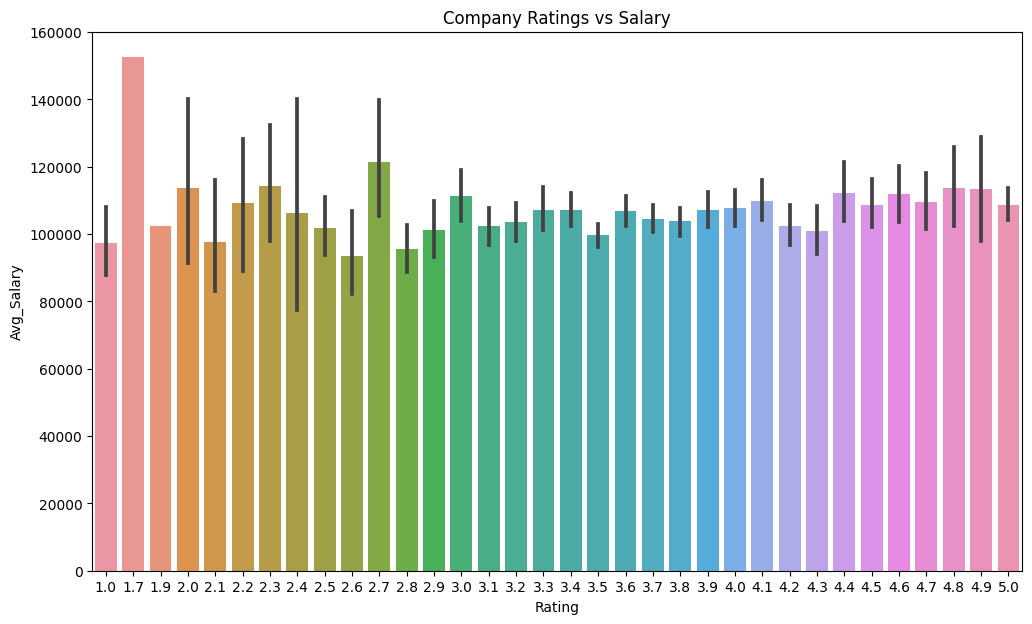

In [166]:
fig = plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Avg_Salary', data=df)
plt.title('Company Ratings vs Salary',fontsize=12)

/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_70248/1644025003.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


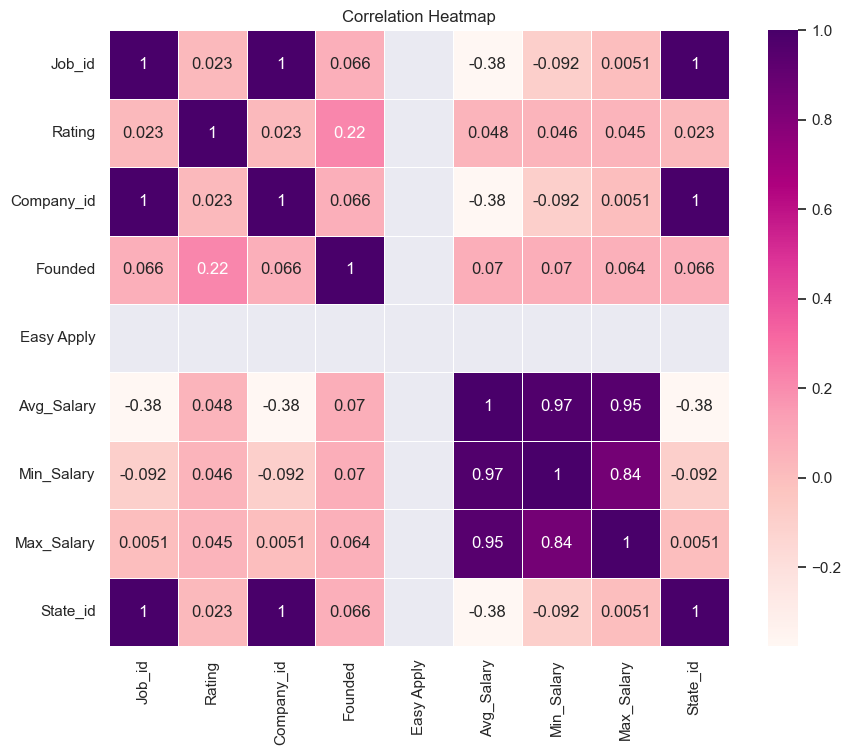

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size

# Customize the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True,color = 'pink', cmap='RdPu', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


/var/folders/t8/9qqw45pj2ns236fmzm2y_lfr0000gp/T/ipykernel_70248/3413912088.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = modified_df.corr()


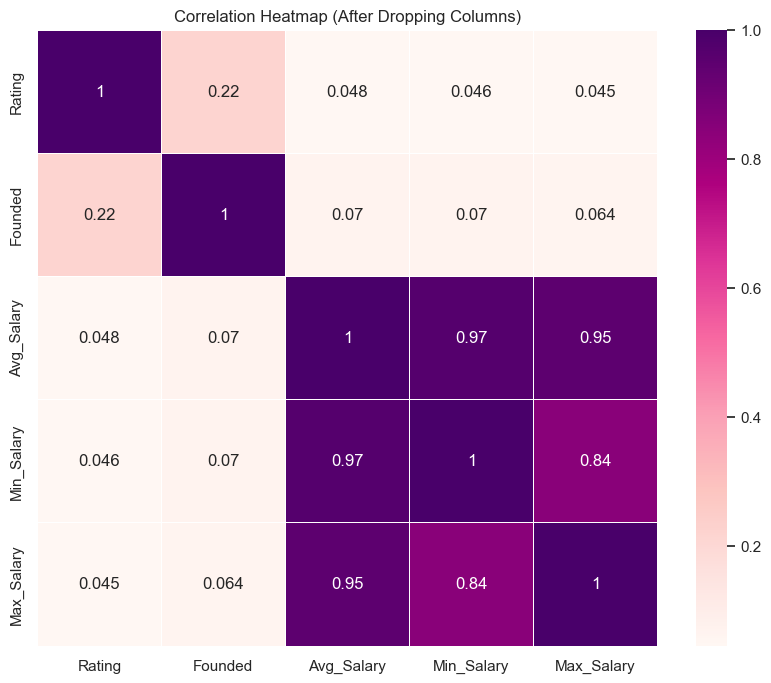

In [118]:

newdf=pd.read_csv('data/clean_data.csv')
# Drop columns job_id and company_id from  DF
columns_to_drop = ['Job_id', 'Company_id', 'Easy Apply', 'State_id']  
modified_df = newdf.drop(columns_to_drop, axis=1)

# Calculate the correlation matrix
correlation_matrix = modified_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8)) 

# Customize the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap (After Dropping Columns)')

# Display the plot
plt.show()


<AxesSubplot: xlabel='Rating', ylabel='Avg_Salary'>

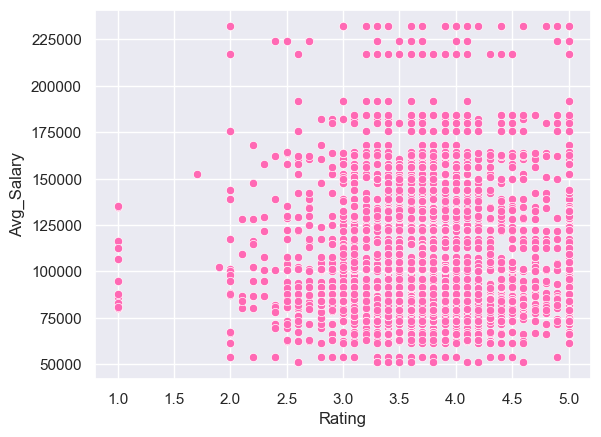

In [97]:
sns.scatterplot(data=df, y="Avg_Salary", x="Rating", color= "#FF69B4")





<AxesSubplot: xlabel='Job Title', ylabel='Avg_Salary'>

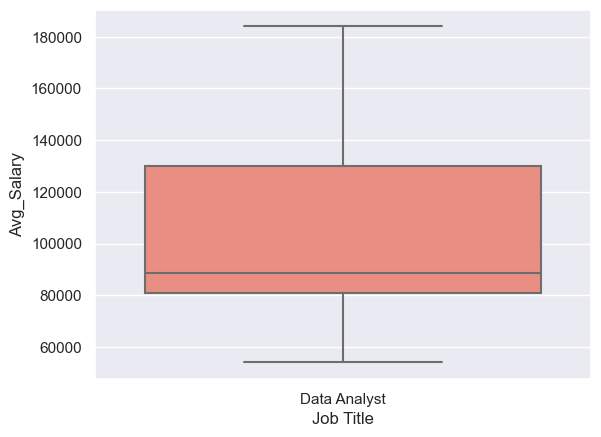

In [102]:
df2= df[df['Job Title']=='Data Analyst']
sns.boxplot(x= 'Job Title', y= 'Avg_Salary', data= df2, showfliers=False, color = 'salmon')
